## Load Libraries and Parameters:

### Libraries:

In [1]:
import sys
sys.path.append('core')
import hydromet_reduced
from hydromet import*

### Specify parameters: 
- Shared parameters needed for running the EventsTable.ipynb and the reEventsTable.ipynb.

In [2]:
## Filenames and paths:
Project_Area = 'Sacramento'
Pluvial_Model = 'ARN'          
BCN = 'D30'    
pluvial_params = '{0}_{1}_Pluvial_Parameters.xlsx'.format(Project_Area, Pluvial_Model)  # Not required if curve number is manually set below

root_dir = pl.Path(r'C:\Users\sputnam\Desktop\PFRA_Production\Sacramento')
#root_dir = pl.Path(os.getcwd())
inputs_dir = root_dir/'Inputs'
outputs_dir = root_dir/'Outputs'
notebook_dir = root_dir/'Notebooks'
pluvial_params_dir = inputs_dir/pluvial_params  # Not required if curve number is manually set below


## Options:
seed = 608 # np.random.randint(low=0, high=10000)
display_plots = True
display_print = True
distal = False # Indicates whether the notebook is being called from papermill via the distEventsTable.ipynb

---

## A. Run EventsTable Notebook:

### Specify parameters:

In [3]:
## Excess rainfall parameters:
#CN = 80                      # Curve number
#volume = 2                   # NOAA Atlas 14 volume
#region = 1                   # NOAA Atlas 14 region
durations = [6, 12, 24, 96]  # Calculate multiple durations 
#durations = [6]             # Calcuate a single duration


## Grouping parameters:
tempEpsilon_dic = {'6': 1, '12': 2, '24': 4, '96': 16} 
tempEpsilon2_dic = {'6': 0.5, '12': 1, '24': 2, '96': 8}
convEpsilon_dic = {'6': 133.33, '12': 150, '24': 160.0, '96': 155.56}
volEpsilon_dic = {'6': 66.67, '12': 66.67, '24': 66.67, '96': 66.67}


## Filenames and paths:
precip_table = '{0}_{1}_{2}_PrecipTable.xlsx'.format(Project_Area, Pluvial_Model, BCN) 

precip_table_dir = outputs_dir/precip_table
datarepository_dir = pl.Path(os.getcwd())/'DataRepository'
bin_dir = pl.Path(os.getcwd())/'bin'
#datarepository_dir = root_dir/'DataRepository'
#bin_dir = root_dir/'bin'


## Options:
save_dss = False
remove_ind_dur = True #Remove individual duration files which are combined at the end of this notebook

### Run:

In [4]:
print("Randomly selected seed: {0}".format(seed))

if not os.path.exists(notebook_dir): os.mkdir(notebook_dir)
    
nb_executed = {}

for dur in durations:
    nb_executed[str(dur)] = str(notebook_dir/'EventsTable_{0}_{1}_{2}_Dur{3}_tempE{4}_{5}_convE{6}_volE{7}.ipynb'.format(Project_Area, Pluvial_Model, BCN, dur, 
                                                                                                                         tempEpsilon_dic[str(dur)], tempEpsilon2_dic[str(dur)],
                                                                                                                         convEpsilon_dic[str(dur)], volEpsilon_dic[str(dur)]))
    print(nb_executed[str(dur)])
    
    nb_parameters = {'duration': dur, 'tempEpsilon': tempEpsilon_dic[str(dur)], 'tempEpsilon2': tempEpsilon2_dic[str(dur)], 'convEpsilon': convEpsilon_dic[str(dur)],
                       'volEpsilon': volEpsilon_dic[str(dur)], 'AOI': BCN, 'inputs_dir': str(inputs_dir), 'precip_table_dir': str(precip_table_dir), 
                       'datarepository_dir': str(datarepository_dir), 'bin_dir': str(bin_dir), 'outputs_dir': str(outputs_dir), 'seed': seed,
                       'display_plots': display_plots, 'display_print': display_print,'save_dss': save_dss}
    
    if 'CN' not in locals() and 'volume' not in locals():
        nb_parameters['pluvial_params_dir'] = str(pluvial_params_dir)
    elif 'CN' not in locals():
        nb_parameters['pluvial_params_dir'] = str(pluvial_params_dir)
        nb_parameters['volume'] = volume  
        nb_parameters['region'] = region   
    elif 'volume' not in locals(): 
        nb_parameters['CN'] = CN  
    
    pm.execute_notebook('EventsTable.ipynb', nb_executed[str(dur)], parameters = nb_parameters);
    
    nb = nb_executed[str(dur)]
    ! jupyter nbconvert $nb --log-level WARN

Randomly selected seed: 608
C:\Users\sputnam\Desktop\PFRA_Production\Sacramento\Notebooks\EventsTable_Sacramento_ARN_D30_Dur6_tempE1_0.5_convE133.33_volE66.67.ipynb


c:\users\sputnam\appdata\local\continuum\anaconda3\lib\site-packages\nbconvert\filters\datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['application/scrapbook.scrap.json+json']) is not able to be represented.
  mimetypes=output.keys())


C:\Users\sputnam\Desktop\PFRA_Production\Sacramento\Notebooks\EventsTable_Sacramento_ARN_D30_Dur12_tempE2_1_convE150_volE66.67.ipynb


c:\users\sputnam\appdata\local\continuum\anaconda3\lib\site-packages\nbconvert\filters\datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['application/scrapbook.scrap.json+json']) is not able to be represented.
  mimetypes=output.keys())


C:\Users\sputnam\Desktop\PFRA_Production\Sacramento\Notebooks\EventsTable_Sacramento_ARN_D30_Dur24_tempE4_2_convE160.0_volE66.67.ipynb


c:\users\sputnam\appdata\local\continuum\anaconda3\lib\site-packages\nbconvert\filters\datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['application/scrapbook.scrap.json+json']) is not able to be represented.
  mimetypes=output.keys())


C:\Users\sputnam\Desktop\PFRA_Production\Sacramento\Notebooks\EventsTable_Sacramento_ARN_D30_Dur96_tempE16_8_convE155.56_volE66.67.ipynb


c:\users\sputnam\appdata\local\continuum\anaconda3\lib\site-packages\nbconvert\filters\datatypefilter.py:41: UserWarning: Your element with mimetype(s) dict_keys(['application/scrapbook.scrap.json+json']) is not able to be represented.
  mimetypes=output.keys())


### Display the results:

#### Open the executed notebook and extract the scraps:

In [5]:
final_reduction_dic = {}

for dur in durations:
    nb = sb.read_notebook(nb_executed[str(dur)])
    final_reduction_dic[str(dur)] = nb.scraps['final_reduction_lst'][1]

#### Final incremental excess rainfall results (combined events):

In [6]:
for dur in durations:
    print("Number of curves reduced by {0}% or {1} curves out of {2} remaining".format(np.round(final_reduction_dic[str(dur)][0], 2), final_reduction_dic[str(dur)][1], final_reduction_dic[str(dur)][2]))

Number of curves reduced by 93.72% or 309 curves out of 4922 remaining
Number of curves reduced by 94.83% or 258 curves out of 4993 remaining
Number of curves reduced by 94.65% or 266 curves out of 4976 remaining
Number of curves reduced by 95.23% or 237 curves out of 4970 remaining


### Combine the results for all durations and save:

#### Excess rainfall:

In [7]:
excess_dic = combine_results('Excess_Rainfall', outputs_dir, BCN, durations, tempEpsilon_dic, convEpsilon_dic, volEpsilon_dic, BCN, remove_ind_dur)

with open(outputs_dir/'{0}_{1}_{2}.json'.format(Project_Area, Pluvial_Model, BCN), 'w') as f:
    json.dump(excess_dic, f)

#### Event weights:

In [8]:
weights_dic = combine_results('Weights', outputs_dir, BCN, durations, tempEpsilon_dic, convEpsilon_dic, volEpsilon_dic, BCN, remove_ind_dur)

with open(outputs_dir/'{0}_{1}_{2}_Weights.json'.format(Project_Area, Pluvial_Model, BCN), 'w') as f:
    json.dump(weights_dic, f)

Total Weight: 0.5


#### Metadata:

In [9]:
metadata = combine_metadata(outputs_dir, BCN, durations, tempEpsilon_dic, convEpsilon_dic, volEpsilon_dic, BCN, remove_ind_dur)

with open(outputs_dir/'{0}_{1}_{2}_Metadata.json'.format(Project_Area, Pluvial_Model, BCN), 'w') as f:
    json.dump(metadata, f)       

### QC the combined results:

#### Plot the weight versus the total runoff for each group

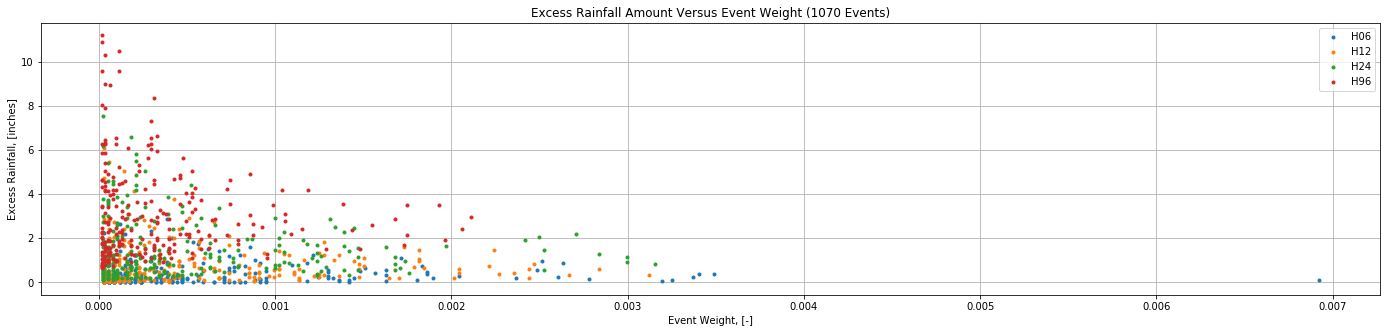

In [12]:
plot_amount_vs_weight(weights_dic, excess_dic, BCN, BCN)

---

## B. Run reEventsTable Notebook:

### Check if the pluvial domain has stormwater infrastructure:

In [13]:
run_reduced = checkif_SWinfra(pluvial_params_dir, BCN, display_print)

Is there stormwater infrastructure? -> NO


### If it does, run the notebook:

In [14]:
if run_reduced == 'YES':
    reEventsTable = str(notebook_dir/'reEventsTable_{0}_{1}_{2}.ipynb'.format(Project_Area, Pluvial_Model, BCN))
                                                                                                                 
    nb_parameters = {'Project_Area': Project_Area,'Pluvial_Model': Pluvial_Model, 'BCN': BCN, 'pluvial_params_dir': str(pluvial_params_dir),
                     'outputs_dir': str(outputs_dir), 'display_plots': display_plots, 'display_print': display_print, 'distal': distal}
    
    pm.execute_notebook('reEventsTable.ipynb', reEventsTable, parameters = nb_parameters);
    
    ! jupyter nbconvert $reEventsTable --log-level WARN

---

## Save a Copy of this Notebook:

### File save this notebook and then run:

In [15]:
orig_nb = 'PM-EventsTable'
new_nb = '{0}_{1}_{2}_{3}.ipynb'.format(orig_nb, Project_Area, Pluvial_Model, BCN)
new_nb_path = str(notebook_dir/new_nb)

shutil.copy(pl.Path(os.getcwd())/'{0}.ipynb'.format(orig_nb), new_nb_path)

! jupyter nbconvert $new_nb_path --log-level WARN

## End